# K-means

## Bibliotecas

In [34]:
# Visualização dos Clusters
library(cluster)
# Gráficos
library(caTools)
library(gplots)
# Métricas
library(caret)
set.seed(1)

## Base de Dados - Iris

In [26]:
df = iris[-5]
head(df)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


## K-Means

Parâmetros

- **x** - Matriz numérica de dados, ou um objeto que pode ser forçado a tal matriz (como um vetor numérico ou um quadro de dados com todas as colunas numéricas).
- **centers** - ou número de clusters, digamos \ (k \), ou um conjunto de centros de cluster iniciais (distintos). Se for um número, um conjunto aleatório de (distintas) linhas em x é escolhido como os centros iniciais.
- **iter.max** - O número máximo de iterações permitidas.
- **nstart** - Se centros for um número, quantos conjuntos aleatórios devem ser escolhidos?
- **algorithm** - Caractere: pode ser abreviado. Observe que "Lloyd" e "Forgy" são nomes alternativos para um algoritmo.
- **Object** - Um objeto R da classe "kmeans", tipicamente o resultado ob de ob <- kmeans (..).
- **method** - Caractere: pode ser abreviado. causas "centros" ajustados para retornar centros de cluster (um para cada ponto de entrada) e causas "classes" ajustados para retornar um vetor de atribuições de classe.
- **trace** - Número lógico ou inteiro, atualmente usado apenas no método padrão ("Hartigan-Wong"): se positivo (ou verdadeiro), é produzida a informação de rastreamento do progresso do algoritmo. Valores mais altos podem produzir mais informações de rastreamento.

Atributos

- **cluster** - Um vetor de inteiros (de 1: k) indicando o cluster ao qual cada ponto está alocado.
- **centers** - Uma matriz de centros de cluster.
- **totss** -  A soma total dos quadrados.
- **withinss** - Vetor da soma dos quadrados dentro do cluster, um componente por cluster.
- **tot.withinss** - Soma total dos quadrados dentro do cluster, ou seja, soma (dentro do grupo).
- **betweenss** - A soma dos quadrados entre os grupos, ou seja .otss-tot.withinss.
- **size** - O número de pontos em cada cluster.
- **iter** - O número de iterações (externas).
- **ifault** - inteiro: indicador de um possível problema de algoritmo - para especialistas. 

In [27]:
agrupador = kmeans(x = df, centers = 3)
grupos = agrupador$cluster

## Exibir os Clusters

- A função **clusplot** pode ser usada para exibir os clusters dos dados

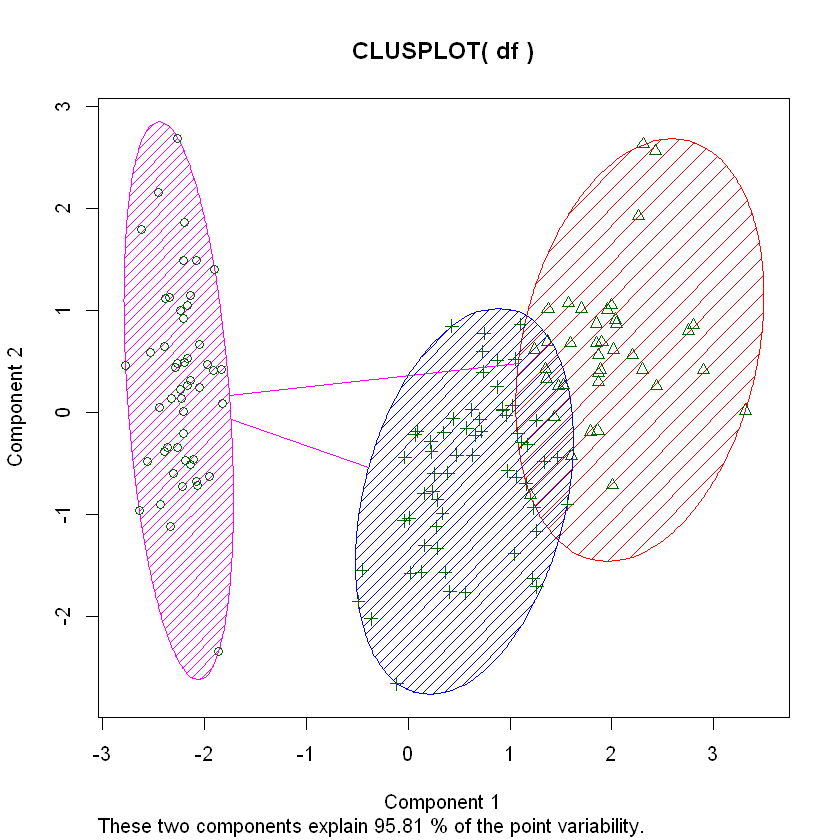

In [32]:
clusplot( 
    df,
    grupos,
    color = TRUE,
)

# Matriz de Confusão

- A função **table** realiza o agrupamento dos dados
- A função **confusionMatriz** da biblioteca **caret** também calcula a matriz de confusão + as métricas

In [37]:
matriz_confusao = table(iris$Species, grupos)
matriz_confusao

            grupos
              1  2  3
  setosa     50  0  0
  versicolor  0  2 48
  virginica   0 36 14

In [41]:
grupos <- ifelse((grupos == 1), 'setosa', grupos)
grupos <- ifelse((grupos == 3), 'versicolor', grupos)
grupos <- ifelse((grupos == 2), 'virginica', grupos)

In [43]:
matriz = confusionMatrix(factor(iris$Species), factor(grupos))
matriz

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0         14        36

Overall Statistics
                                          
               Accuracy : 0.8933          
                 95% CI : (0.8326, 0.9378)
    No Information Rate : 0.4133          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.84            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.7742           0.9474
Specificity                 1.0000            0.9773           0.8750
Pos Pred Value              1.0000            0.9600           0.7200
Neg Pred Value              1.0000            0.8600           0.9800
P

## Personalizando a Matriz de Confusão

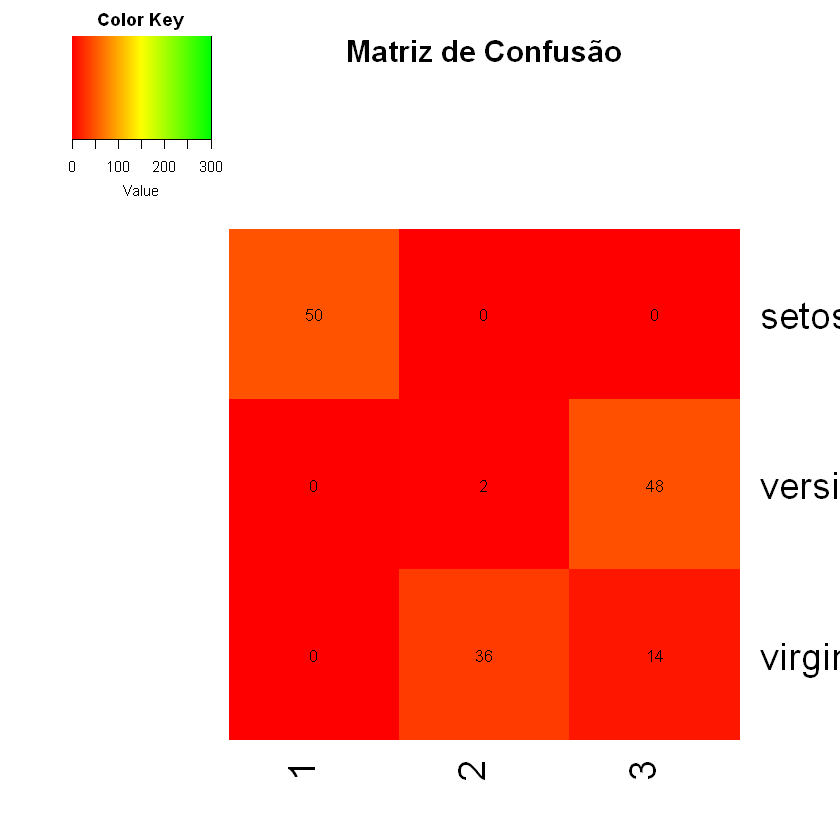

In [46]:
my_palette <- colorRampPalette(c("red", "yellow", "green"))

col_breaks = c(0:50, 51:100, 101:300)

heatmap.2(matriz_confusao,
    Rowv = 'NA',
    cellnote = matriz_confusao, 
    main = "Matriz de Confusão",
    notecol="black",      
    density.info="none",  
    trace="none",        
    col=my_palette,       
    breaks=col_breaks,   
    dendrogram= 'none',     
    Colv="NA" 
)

## Eblow - Melhor K

- Como podemos ver no gráfico abaixo o melhor K serie 3, exatamente o número de classes originais.

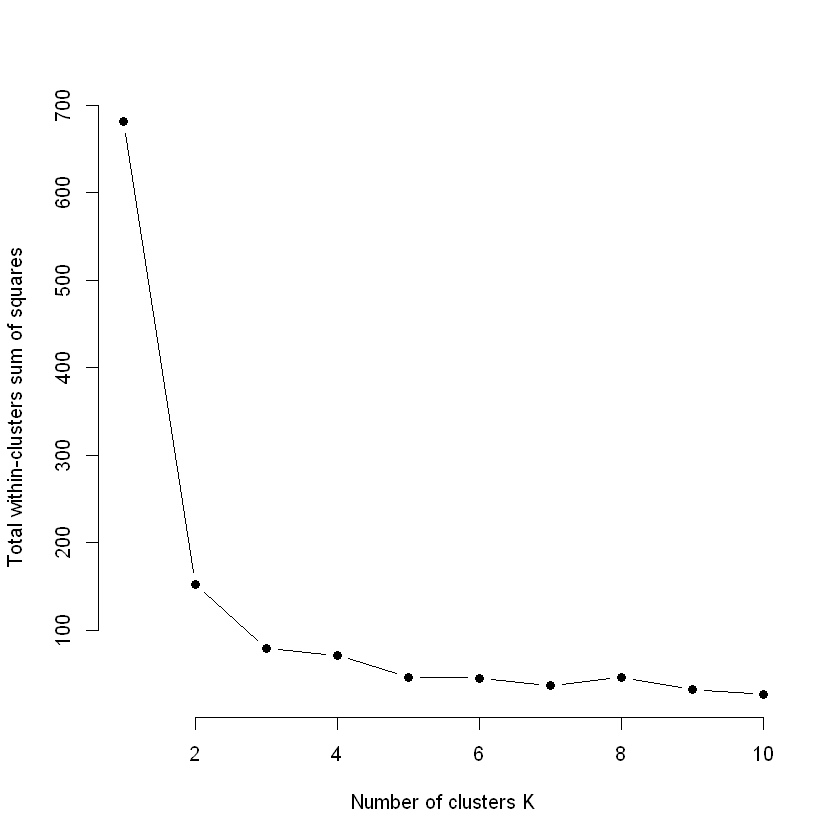

In [23]:
wcss = vector()

for(i in 1:10) {
    grupo = kmeans(df, centers = i)
    wcss[i] = sum(grupo$withinss)
}

plot(
    1:10,
    wcss,
    type="b",
    pch = 19,
    frame = FALSE, 
    xlab="Número de Clusters K",
    ylab="Total within-clusters sum of squares"
)